In [2]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from datetime import datetime, timedelta
import pytz
from pytz import timezone
from pandas.io import sql
import pymysql.cursors

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [3]:
users_df = pd.read_csv('/Users/kevenlemoing/Sites/Lifesum_assignement/data/users.csv',error_bad_lines=False)
users_df.head()

,user_id,start_date,height_cm,age,country,language,gender,timezone,goal_weight_kg
0,24822001,2017-09-14,NaN,18.0,BR,pt,f,-03:00,178.7
1,23529201,2017-07-12,50.0,23.0,NL,nl,m,NaN,50.0
2,24352001,2017-08-21,50.0,20.0,US,en,f,NaN,57.2
3,23379001,2017-07-05,52.0,26.0,GB,en,f,Asia/Calcutta,33.1
4,24776001,2017-09-12,52.0,23.0,CA,en,f,America/Toronto,70.0


,user_id,start_date,height_cm,age,country,language,gender,timezone,goal_weight_kg
0,24822001,2017-09-14,NaN,18.0,BR,pt,f,-03:00,178.7
1,23529201,2017-07-12,50.0,23.0,NL,nl,m,NaN,50.0
2,24352001,2017-08-21,50.0,20.0,US,en,f,NaN,57.2
3,23379001,2017-07-05,52.0,26.0,GB,en,f,Asia/Calcutta,33.1
4,24776001,2017-09-12,52.0,23.0,CA,en,f,America/Toronto,70.0


In [203]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5810 entries, 0 to 5809
Data columns (total 9 columns):
user_id           5810 non-null int64
start_date        5810 non-null object
height_cm         5809 non-null float64
age               5810 non-null float64
country           5808 non-null object
language          5810 non-null object
gender            5810 non-null object
timezone          5348 non-null object
goal_weight_kg    5810 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 408.6+ KB


In [200]:
print len(users_df['gender'])

5810


**--> The lenght is equal to the dataframe lenght. We could use this column to iterate with loops on non-string-columns**

# First data cleaning

1) About NaN values

The first option is to drop each row which contains a NaN value.

In [142]:
#First option -> using dropna function
print(len(users_df.index) - len(users_df.dropna().index))

464


We get 464 rows left. 
It's raisonable but let's apply the second option where we can keep the entire datasets 

It's about replacing NaN values by a blank.

In [212]:
#Second option 

#users_df = users_df.fillna('')
#users_df = users_df.dropna()
#users_df.head()

In [223]:
#Convert "age" column to int type
users_df['age'] = users_df['age'].astype(int)

#Convert "start_date" column to datetime type
users_df['start_date'] = pd.to_datetime(users_df['start_date'])

In [89]:
# Types of country, language and gender are aleady ok
print(type(users_df['country'][1]))
print(type(users_df['language'][1]))
print(type(users_df['gender'][1]))

<type 'str'>
<type 'str'>
<type 'str'>


In [220]:
#To decide and justify on which column we will start our next data processing
print (len(users_df['country']) - users_df['country'].count())
print (len(users_df['timezone']) - users_df['timezone'].count())
print (len(users_df['start_date']) - users_df['start_date'].count())

2
462
0


**We have to get the timezone by the country key code**

# @TODO DATA VIZUALISATION HERE

In [224]:
#Uniformizing the column "timezone"

#We could apply a little cleaning on NaN values in order to use the len() function on this column (not mandatory)
#users_df['timezone'] = users_df['timezone'].fillna('')

#We use user_id to be able to apply the len function because there are no NaN value. 
#We can also use the fillna function (cf. above), but the goal is to manage only datetime data type in this column

#We import all of timezones in this list
timezone_repo = pytz.all_timezones

for i in range (len(users_df['gender'])):
    
    if pd.notnull(users_df['country'][i]):
        
        if users_df['timezone'][i] not in timezone_repo:
            country_list = pytz.country_timezones[users_df['country'][i]]
            users_df['timezone'][i] = str(country_list[0])

        timezone = pytz.timezone(users_df['timezone'][i])
        fmt = '%Y-%m-%d %H:%M:%S %Z%z'
        loc_dt = timezone.localize(users_df['start_date'][i])
        timezone_dt = loc_dt.astimezone(timezone)
        users_df['timezone'][i] = timezone_dt.strftime(fmt)
            
users_df.head()

/Users/kevenlemoing/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kevenlemoing/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,user_id,start_date,height_cm,age,country,language,gender,timezone,goal_weight_kg
0,24822001,2017-09-14,NaN,18,BR,pt,f,2017-09-14 00:00:00 FNT-0200,178.7
1,23529201,2017-07-12,50.0,23,NL,nl,m,2017-07-12 00:00:00 CEST+0200,50.0
2,24352001,2017-08-21,50.0,20,US,en,f,2017-08-21 00:00:00 EDT-0400,57.2
3,23379001,2017-07-05,52.0,26,GB,en,f,2017-07-05 00:00:00 IST+0530,33.1
4,24776001,2017-09-12,52.0,23,CA,en,f,2017-09-12 00:00:00 EDT-0400,70.0


In [228]:
#Save to the MySQL DB, in the table users

# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='root',
                             db='lifesum',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

users_df.to_sql(con=connection, name='users', if_exists='replace', flavor='mysql')


/Users/kevenlemoing/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1165: FutureWarning: The 'mysql' flavor with DBAPI connection is deprecated and will be removed in future versions. MySQL will be further supported with SQLAlchemy connectables.
  chunksize=chunksize, dtype=dtype)


# First vizualisations

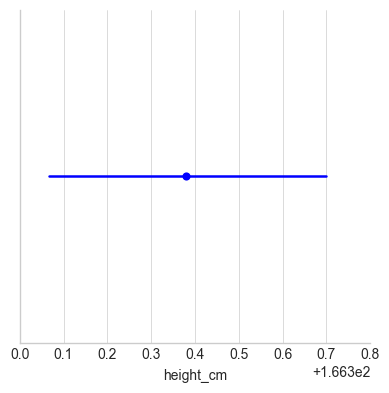

In [36]:
sns.factorplot('height_cm',data=users_df)

TypeError: argument 2 to map() must support iteration

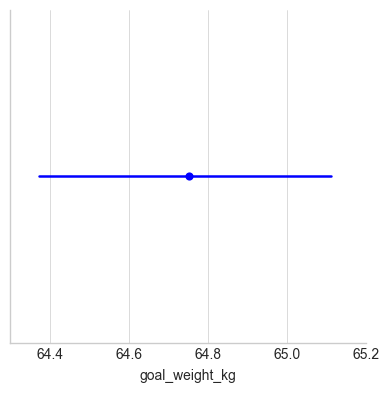

In [17]:
sns.factorplot('goal_weight_kg',data=users_df,hue='gender')

In [ ]:
#par taille

# Second data cleaning

In [ ]:
##Some goals are not relevant
##Some height_cm are not relevant
##--> definir le poids "bon pour la santé" (relation entre poids et taille) et le comparer avec les objectifs du user